# Analyse de réseau des cartels sud-américains : quelles relations entretiennent les cartels et les criminels qui y appartiennent ?

## Introduction
Cette analyse vise à mieux appréhender le paysage criminel sud-américain. Nous désignons ici par "cartel" toute organisation se livrant à une activité de crime organisé, qu'il s'agisse de **terrorisme, de trafic de drogue ou d'armes, de traite humaine, de kidnapping / prise d'otage, d'extorsion, d'extraction de minerai illégale**, etc.

Apparus dans les années 60, ces organisations se sont développées rapidement, satisfaisant la demande provenant notamment des États-Unis. Dans les années 1980, c'est la société colombienne qui a été meurtrie par ces organisations.  Elle demeure aujourd'hui le 2ème pays le plus touché par la criminalité dans le monde, le Mexique qui se classant 4ème et le Honduras 10ème, selon l'indice mondial du crime organisé publié par le *Global Initiative Against Transnational Organized Crime<sup>1</sup>*.

Dans des sociétés historiquement classistes, ces organisations criminelles entretiennent un cercle vicieux, à la fois cause et conséquence d'une **corruption généralisée, d'un recul de la démocratie et de la liberté de la presse**. Pénétrant toutes les couches de la société, des classes les plus pauvres aux classes les plus riches, les cartels ont des membres et soutiens dans les **favellas, les systèmes politique, législatif et judiciaire, le milieu économique, entrepreneurial, agricole et minier, sans mentionner les ingérences étrangères**.

L'objectif ici est donc :
- de proposer une **cartographie** de ces cartels et des individus qui les composent
- d'appréhender la **nature et l'intensité des relations** qu'ils entretiennent
- d'analyser les **caractéristiques** de ce réseau
- d'être en mesure de **concentrer / filtrer l'analyse** sur différents aspects, e.g. **l'activité** du groupe ou le / les **pays** où il opère

## Méthodologie

L'analyse a été réalisée en Python. Nous avons d'abord moissonné les informations publiées sur *[InsightCrime](https://insightcrime.org/)* à l'aide de la librairie *Beautiful Soup*, avant de les nettoyer et de les organiser dans un jeu de données à l'aide de *Pandas*. Nous avons mené une analyse de texte afin de déduire les relations et allégeances depuis les articles moissonnés, ainsi que les tags (plus fiables, puisque sélectionnés par les auteurs des articles). *Spacy* a été utilisé pour l'analyse de sentiments (i.e, les relations alliées ou hostiles d'organisation à organisation, d'individu à organisation, et d'individu à individu). Enfin, nous avons construit et analysé le réseau à l'aide de *NetworkX*.

Le code soutenant cette analyse est disponible dans un référentiel GitHub public, accessible [ici](https://github.com/Hadrien-lcrx/vault-portfolio/tree/main/lab-cartels). Spécifiauement, le moissonnage est accessible dans le notebook [00_scraping.ipynb](https://github.com/Hadrien-lcrx/vault-portfolio/blob/main/lab-cartels/00_scraping.ipynb), et la construction et l'analyse de graph est accessible dans le notebook le notebook [01_graph_analysis.ipynb](https://github.com/Hadrien-lcrx/vault-portfolio/blob/main/lab-cartels/01_graph_analysis.ipynb)

## Analyse
### Résultats de la moisson
Après moisson, nous avons constitué deux jeux de données, l'un qualifiant les organisations et l'autre les individus.

Voici un aperçu du jeu de données constitué pour les **organisations**:

In [ ]:
import pandas as pd
pd.options.display.max_colwidth = 30
organizations_columns = ["URL", "Nom", "Image", "Dernère màj", "Tags", "Pays", "Résumé", "Histoire", "Direction",
                        "Activités criminelles", "Géographie", "Alliés et ennemis", "Perspectives"]
individuals_columns = ["URL", "Nom", "Alias", "Image", "Dernère màj", "Tags", "Pays", "Résumé", "Histoire",
                       "Activités criminelles", "Géographie", "Alliés et ennemis", "Perspectives"]

In [ ]:
organizations = pd.read_csv("./data/organizations.csv", converters={"tags": pd.eval}).drop(["Unnamed: 0", "alias"], axis=1)
organizations.columns = organizations_columns
organizations.head(5)

,URL,Nom,Image,Dernère màj,Tags,Pays,Résumé,Histoire,Direction,Activités criminelles,Géographie,Alliés et ennemis,Perspectives
0,https://insightcrime.org/v...,Carlos Capa Gang,./images/organizations/car...,2023-01-27,"[megabandas, venezuela, ve...",venezuela,"The Carlos Capa gang, whic...",Carlos Capa grew up in San...,Carlos Capa's leadership w...,As a result of his strong ...,One of the main forms of i...,"Over the years, members of...",Despite successful operati...
1,https://insightcrime.org/v...,The R Organization,./images/organizations/the...,2023-01-26,"[illegal mining, venezuela...",venezuela,The R Organization (Organi...,The R Organization evolved...,The OR was founded by Edua...,The R Organization maintai...,The R Organization benefit...,The R Organization claims ...,While the R Organization i...
2,https://insightcrime.org/v...,Tren de Guayana,./images/organizations/tre...,2021-01-26,"[venezuela, venezuela groups]",venezuela,Tren de Guayana is one of ...,Tren de Guayana began oper...,Tren de Guayana likely rec...,Ronny Matón has led Tren d...,Tren de Guayana maintains ...,Although the political clo...,Tren de Guayana's territor...
3,https://insightcrime.org/e...,Lobos,./images/organizations/lob...,2022-11-08,"[ecuador, ecuador groups]",ecuador,The Lobos have emerged as ...,Like many of Ecuador's gan...,According to the Ecuadoria...,The Lobos operated mainly ...,The Lobos' primary source ...,The Lobos are allied with ...,Ecuador has the third-high...
4,https://insightcrime.org/c...,400 Mawozo,./images/organizations/400...,2022-03-23,"[caribbean, haiti, haiti g...",haiti,The 400 Mawozo (400 Lame M...,Even though little was kno...,"Joseph Wilson, alias “Lanm...",The 400 Mawozo gang is lar...,The 400 Mawozo criminal ac...,InSight Crime has not iden...,The involvement of the 400...


Voici un aperçu du jeu de données constitué pour les **individus**:

In [3]:
individuals = pd.read_csv("./data/individuals.csv", converters={"tags": pd.eval}).drop(["Unnamed: 0"], axis=1)
individuals.columns = individuals_columns
individuals.head(5)

,URL,Nom,Alias,Image,Dernère màj,Tags,Pays,Résumé,Histoire,Activités criminelles,Géographie,Alliés et ennemis,Perspectives
0,https://insightcrime.org/m...,Genaro García Luna,NaN,./images/individuals/genar...,2023-01-18,"[elites and crime, mexico,...",mexico,Genaro García Luna is the ...,"García Luna, who was born ...",The charges García Luna fa...,While his authority as Min...,During his time as the hea...,García Luna's future depen...
1,https://insightcrime.org/c...,Gilberto Rodríguez Orejuela,The Chess Player,./images/individuals/gilbe...,2022-06-15,[colombia personalities],colombia,"For more than two decades,...",Gilberto Rodríguez Orejuel...,Gilberto Rodríguez Orejuel...,Under the leadership of th...,Gilberto Rodríguez Orejuel...,NaN
2,https://insightcrime.org/c...,Jobanis de Jesús Ávila Vil...,Chiquito Malo,./images/individuals/joban...,2022-06-17,"[colombia, colombia person...",colombia,Jobanis de Jesús Ávila Vil...,Chiquito Malo was born in ...,Chiquito Malo took over th...,Before assuming leadership...,As the Urabeños’ top leade...,With just a few months at ...
3,https://insightcrime.org/h...,Juan Orlando Hernández,NaN,./images/individuals/juan-...,2022-04-20,"[honduras, honduras person...",honduras,Juan Orlando Hernández Alv...,Hernández started his poli...,Hernández has been accused...,With the protection of the...,"Through his brother, Herná...",If Hernández goes to trial...
4,https://insightcrime.org/a...,Ariel Máximo Cantero,Guille,./images/individuals/ariel...,2022-10-20,"[argentina, argentina pers...",argentina,"Ariel Máximo Cantero, alia...","Cantero, alias “Guille,” i...",In addition to the Monos’ ...,Cantero grew up in the La ...,Cantero counts corrupt pub...,With seven sentences for d...


### Cartographie
Après nettoyage, manipulation et exlpoitation des jeux de données présentés ci-dessus, et les différentes étapes énoncées dans la partie *Méthodologie* précédente, nous avons réalisé la cartographie suivante, où :
- les **<span style="color:#DDCC77">noeuds verts clair</span>** représentent les **organisations**
- les **<span style="color:#88CCEE">noeuds bleus clair</span>** représentent les **individus**
- les **<span style="color:#44AA99">arrêtes bleues lagon</span>** représentent les relations **alliées**
- les **<span style="color:#882255">arrêtes pourpres</span>** représentent les relations **hostiles**

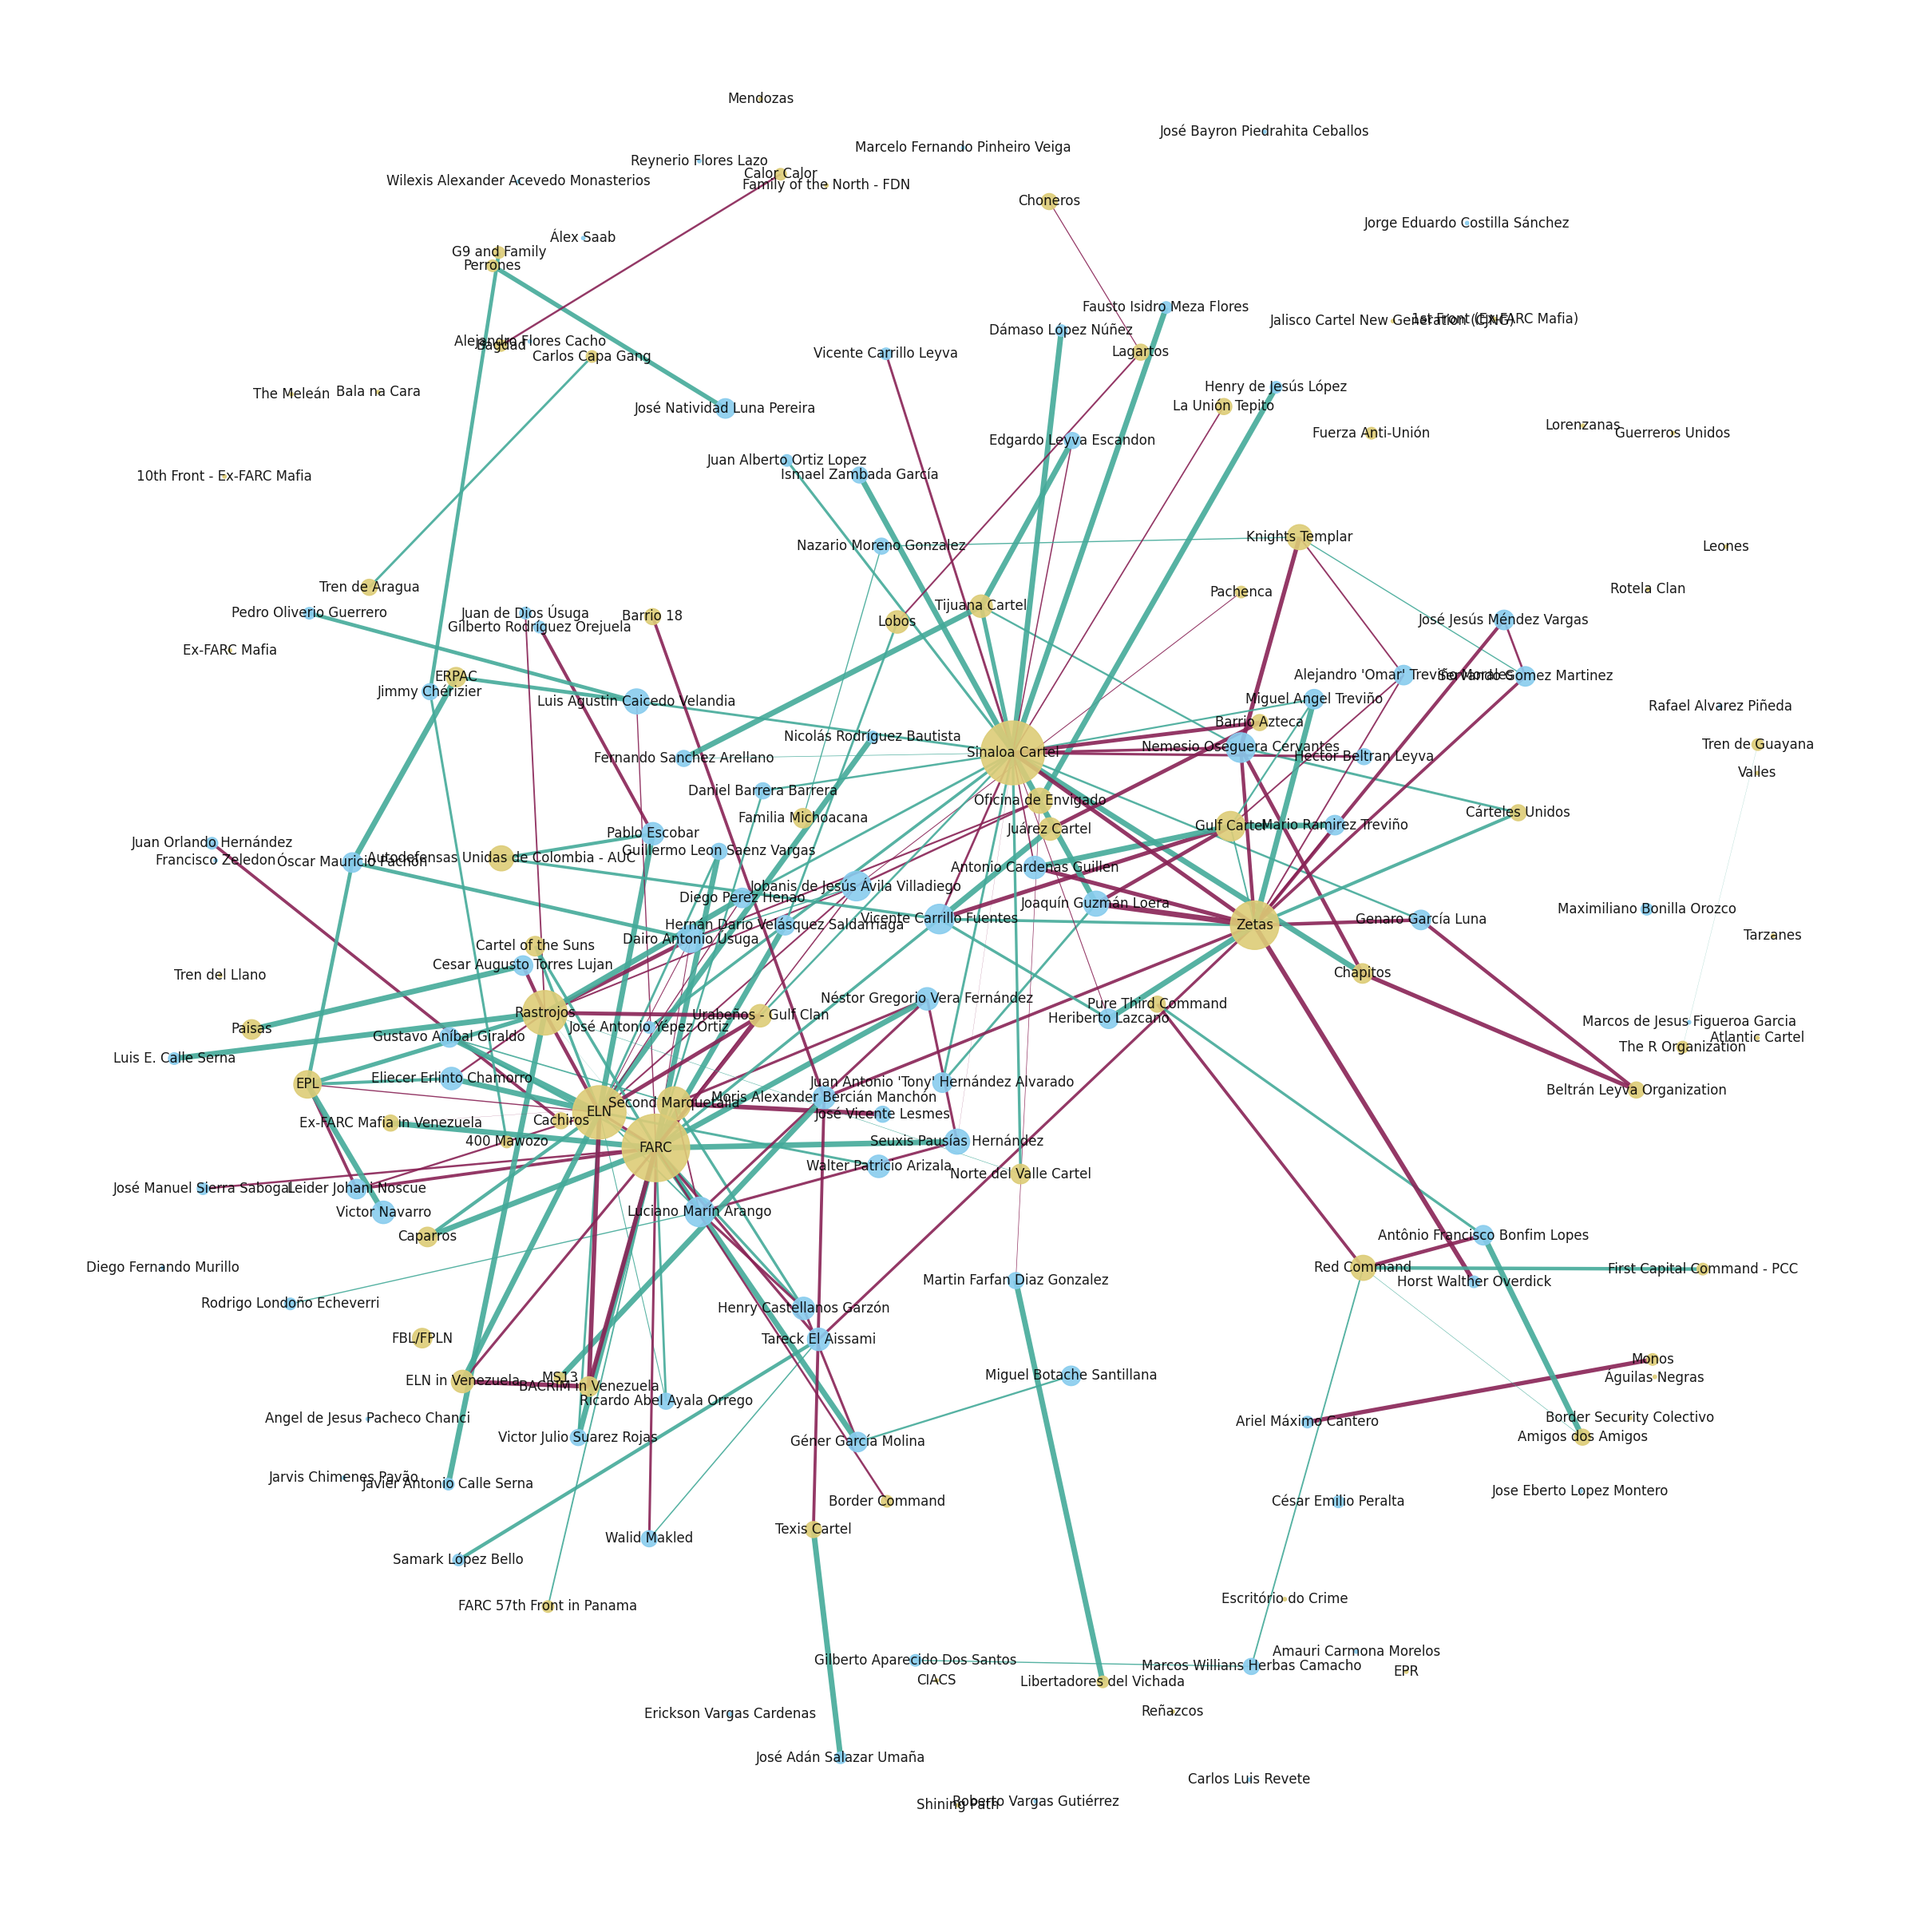

### Caractéristiques du réseau
- Une analyse stationnaire de distribution révèle que les organisations les plus connectées de ce réseau sont, par ordre d'importance :
    1. Les FARC (*Fuerzas Armadas Revolucionarias de Colombia*, ou Forces Armées Révolutionnaires de Colombie), affaiblis par la démobilisation récente suite à l'accord de paix conduit par l'ancien président de la Colombie Juan Manuel Santos. Pourtant, de nombreux *guerilleros* ont rejeté cet accord, les FARC **se fragmentant en de multiples sous-organisations se livrant au trafic de drogue et à l'exploitation minière**. Beaucoup d'entre eux sont par ailleurs venus **grossir les rangs de l'ELN**.
    2. Le cartel de Sinaloa, disposant entre autres **d'alliances avec les triades chinoises Soon Yee On et 14K** fournissant les produits chimiques nécessaires à la synthèse méthamphétamine et de fentanyl, et d'appuis aux Philippines. Le cartel de Sinaloa se spécialise dans le trafic de drogues de toutes sortes, et demeure le principal cartel mexicain malgré l'arrestation d'El Chapo, des **luttes intestines** pour sa succession, et de sa **guerre avec les Zetas** dans plusieurs régions du Mexique.
    3. L'ELN (*Ejército de Liberación Nacional*, ou Armée de Libération Nationale), responsable entre autres de **massacres de civils** (le plus récent étant le massacre de mineurs à Tumeremo au Vénézuela en 2016) et **d'attaques terroristes** (la plus récente étant celle d'un camion de policiers anti-émeutes à Cali le 7 janvier 2022). Le groupe se livre également à du recrutement forcé, des prises d'otages, des poses de mines antipersonnel et de l'exploitation minière.
    
- Une analyse stationnaire de distribution révèle que les individus les plus connectés de ce réseau sont, par ordre d'importance :
    1. Dairo Antonio Úsuga, colombien, dit *Otoniel*. Ayant appartenu à l'EPL (*Ejército Popular de Liberación*, ou Armée Populaire de Libération, d'extrême-gauche) puis à l'AUC (*Autodefensas Unidas de Colombia*, ou Autodéfenses Unies de Colombie, d'extrême-droite), il est par la suite devenu le chef du **Clan del Golfo**, se livrant au **trafic de drogue et à l'assassinat de militants politiques et volontaires d'ONG**. Arrêté le 23 octobre 2021, il a été **extradé** vers les États-Unis le 4 mai 2022. Suite à son arrestation, l'AUC s'est livrée au ***paro armado*** (grève armée), menant une répercussion violente dans le nord de la Colombie, prenant des otages, imposant des couvre-feux, bloquant des routes, et incendiant véhicules privés et publics.
    2. Luis Agustin Caicedo Velandia, colombien, dit *Don Lucho*. Il était l'un des nouveaux ***invisibles<sup>2</sup>*** (nouveau mode d'opération visant à se tenir aussi discret et aussi loin de la violence que possible, permettant de maximiser la durée de vie utile du poste tenu). **Blanchisseur d'argent et traficant de drogue**, il servait **d'intermédiaire entre l'AUC et les FARC** et de **logisticien**, assurant l'écoulement des marchandises depuis différents ports pacifiques de Colombie, ainsi que depuis le Vénézuela ou les Caraïbes. Détenant le **record du blanchiment d'argent** (\\$1.5 millards, dont \\$1 milliard entre 2004 et 2009), il a été arrêté à Buenos Aires en 2010, écroué aux États-Unis, et libéré en 2019 suite à sa coopération avec les autorités, identifiant 126 personnes d'intérêt. De retour en Colombie, il a été **assassiné** à Bogotá le 16 juillet 2021.
    3. Óscar Mauricio Pachón, colombien, dit *Puntilla*. Ayant commencé en bas de l'échelle, il est par la suite devenu *sicario* (assassin) pour le cartel de Medellín. Il a par la suite rejoint le cartel Norte del Valle suite à la fragmentation du cartel de Cali, avant de gagner en importance suite à la mise en place de ses propres cultures de coca, laboratoires de synthèse de cocaïne, et réseau de tueurs à gage. Collaborant avec Daniel Arrera, dit *El Loco*, il a saisi son empire suite à l'arrestation de ce-dernier en 2012 (facilitée par la collaboration de Luis Agustin Caicedo Velandia). Échappant à l'attention des autorités jusqu'en 2013, il a été interpellé en février 2016, libéré en avril 2017, et **tué par la police colombienne** lors d'une fusillade à Medellin en 2018.
    
En accord avec le classement du pays dans l'indice de criminalité évoqué en introduction, deux des trois organisations principales sont colombiennes, ainsi que les trois individus principaux identifiés. Si Pablo Emilio Escobar Gaviria est la figure la plus connue, depuis sa mise hors d'état de nuire il y  30 ans, son modèle a malheureusement été repris, copié, amélioré. Par ailleurs, si aucun événement aussi retentissant que l'attentat du vol Avianca 203 n'a eu lieu ces dernières années, le terrorisme reste monnaie courante dans le pays, la Colombie se classant en 2022 14ème<sup>3</sup> au *Global Terrorism Index*, juste devant l'Égypte, faisant d'elle le premier pays sud-américain du classement (le second étant le Chili à la 18ème place). Cette situation illustre les difficultés structurelles à s'échapper d'un cercle vicieux auxquelles un pays fait face lorsque toutes les couches de la société sont en proie à la corruption et la terreur.

## Limites de l'analyse
- Nous sommes **limités par le jeu de données initiales** - autrement dit les informations publiques qu'*InsightCrime* a jugé opportun de publier. Le fait qu'une relation entre deux cartels n'existe pas sur ce graphe ne veut pas dire qu'elle n'existe pas en réalité. Par exemple, le 10th Front - Ex-FARC Mafia n'est pas connecté aux FARC sur le graphe, alors qu'ils en sont directement issus, correspondant au Front Est des FARC avant la démobilisation.
- Les individus étudiés sont les plus connus des autorités et du public. **Certains sont déjà sous les verrous, ou décédés : c'est notamment le cas des trois individus principaux que nous avons identifiés**. Un jeu de données plus complet permettrait une analyse plus approfondie, pertinente, et surtout **actionnable**. 
- Comme nous pouvons le constater visuellement - et comme l'analyse de graphe le confirme - **certains noeuds ne sont pas connectés au reste du réseau**. La donnée utilisée pour construire le graphe vient uniquement des paragraphes ""Allies and Enemies" et des tags sur les articles. Une analyse du reste du texte permettrait sans doute de créer plus de liens.
- L'analyse de sentiment repose sur un algorithme par défaut fourni par *Spacy*. Cet algorithme est sensible et sert difficilement notre analyse : la présence d'un terme tel que *"crime"* ou *"prosecution"* va mener à une détérioration de la note de sentiment. Nous avons tenté de limiter l'impact de cette approche en omettant de tels termes détériorant inutilement la note finale : en ce qui nous concerne, cette détérioration est injustifiée puisque nous ne sommes pas intéressés par le sentiment du *texte*, mais de la *relation entre entités*. Le développement d'un **algorithme personnalisé capable d'identifier le sentiment d'une relation entre deux entités serait plus pertinent**, et – une fois validé - donnerait des résultats beaucoup plus fiables.
- Le choix d'autres graphes pourrait révéler plus d'informations, ou des informations plus nuancées :
    - Un graphe orienté pourrait permettre de mettre en exergue les **relations commerciales** entre les groupes (qui fournit qui).
    - Un multigraphe pourrait permettre de mettre en lumière l'intensité des **différentes relations** entre entités (trafic d'armes, de drogues, etc.) ou de **nuancer ces relations** (e.g. l'ELN et les FARC étaient en guerre, avant qu'un accord de non-agression et de partage de routes ne soit passé en Octobre 2018 au Vénézuela suite à la démobilisation des FARC).
    - La taille des noeuds du graphe ci-dessus reflète le nombre de connections des entités, mais une autre mesure d'intérêt pourrait être le **nombre de membres** ou le **chiffre d'affaires**. Nous émettons cependant l'hypothèse que ces trois mesures sont probablement corrélées dans la plupart des cas.
    - Un graphe faisant apparaître le drapeau du pays correspondant au noeud permettrait de mieux interpréter les **relations géographiques**, et potentiellement les **routes commerciales**.
    - Un graphe faisant **distinguant les individus mis hors d'état de nuire de ceux toujours actifs** serait évidemment fort utile.

## Prochaines étapes
- Conduire une analyse de réseau par **activité criminelle**
- Conduire une analyse de réseau par **pays**
- Utiliser l'intégralité du texte afin **d'identifier plus de relations**
- Construire et utiliser un **algorithme d'analyse de sentiments entre deux entités** (plutôt que de texte)
- Transférer le graphe sous **Neo4J** afin **d'augmenter les possibilités d'interaction et d'exploration**

## Sources
1. “Indice Mondial Du Crime Organisé.” Global Initiative Against Transnational Organized Crime, https://ocindex.net/assets/downloads/global-ocindex-report-french.pdf.
2. McDermott, Jeremy. 2018. “La Nueva Generación de Narcotraficantes Colombianos Post-FARC: ‘Los Invisibles.’” InSight Crime. March 14, 2018. https://es.insightcrime.org/wp-content/uploads/2018/03/La-nueva-generación-de-narcotraficantes-colombianos-post-FARC-Los-Invisibles.pdf.
3. “Global Terrorism Index 2022: measuring the impact of terrorism” Institute for Economics and Peace. March 22, 2022. https://www.visionofhumanity.org/wp-content/uploads/2022/03/GTI-2022-web-04112022.pdf.